<a href="https://colab.research.google.com/github/Canihelpme/DeepLearning_finance/blob/main/Data_process_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install numpy==1.19.5

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
from pathlib import Path

folder = ""
project_dir = ""

base_path = Path("/content/drive/My Drive/")
project_path = base_path / folder / project_dir
os.chdir(project_path)
for x in list(project_path.glob("*")):
    if x.is_dir():
        dir_name = str(x.relative_to(project_path))
        os.rename(dir_name, dir_name.split(" ", 1)[0])
print(f"현재 디렉토리 위치: {os.getcwd()}")

현재 디렉토리 위치: /content/drive/My Drive


In [4]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8 MB 39 kB/s 
     |████████████████████████████████| 449 kB 46.4 MB/s 
     |████████████████████████████████| 50 kB 8.8 MB/s 
     |████████████████████████████████| 3.8 MB 71.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=2d73845d048152e241087d62f1bc6e29fe839d4b412f4c62939907d7de81aeb9
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Succes

In [69]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

from IPython.display import clear_output

import pandas as pd
import os
import time
import glob
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
filename = '/content/drive/MyDrive/Financial_data/Data/train/ko_train.csv'
df_data = pd.read_csv(filename, sep=",",encoding='UTF-8')

import tensorflow as tf
from tensorflow.keras import layers

print('tensorflow version: {}'.format(tf.__version__))
print('GPU 사용 가능 여부: {}'.format(tf.test.is_gpu_available()))

tensorflow version: 2.0.0
GPU 사용 가능 여부: True


In [70]:
date_index = df_data[['Date','End','Open','High','Low','Amount']]
date_index = date_index.copy()
#복사해서 사용시 Dateframe 오류 방지 가능 .loc사용해도 됨.
#https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

date_index['Date'] = date_index.Date.apply(str).str.replace("년","").str.replace("월","").str.replace("일","")
date_index['Date'] = date_index.Date.str.replace(" ","").apply(int)
date_index['End'] = date_index.End.apply(str).str.replace(",","").astype(float)
date_index = date_index[::-1].reset_index(drop=True)
#date_index.sort_values
print(date_index)

          Date      End      Open      High       Low   Amount
0     19960420   941.69     948.6    952.21    941.66   42.81M
1     19960422   950.61    941.75    957.61    941.75   57.15M
2     19960423   940.55    951.47    957.95    940.55   52.69M
3     19960424   956.61     940.5    956.65    934.53   46.24M
4     19960425   964.69    957.56    977.44    957.56   57.17M
...        ...      ...       ...       ...       ...      ...
5994  20200217  2242.17  2,243.07  2,250.05  2,230.26  458.25M
5995  20200218  2208.88  2,225.98  2,232.93  2,205.21  470.42M
5996  20200219  2210.34  2,222.51  2,226.00  2,191.20  591.16M
5997  20200220  2195.50  2,223.55  2,228.18  2,186.72  709.56M
5998  20200221  2162.84  2,165.65  2,184.43  2,160.28  635.47M

[5999 rows x 6 columns]


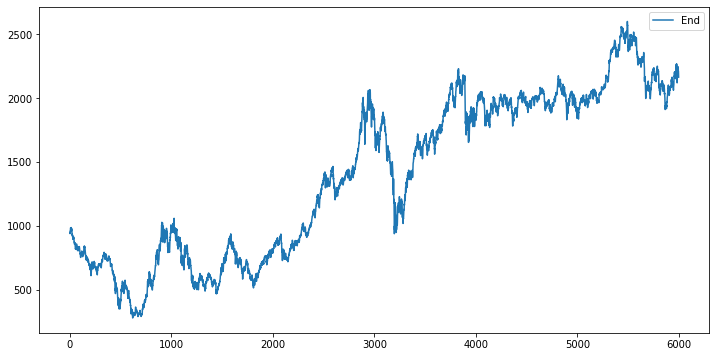

In [71]:
fig = plt.subplots(figsize=(12,6))
ax = plt.gca()
date_index.plot(y='End', ax=ax)
plt.show()

In [6]:
def preprocess(all_files):
  data0 = []
  data1 = []
  data2 = []
  data3 = []
  for f in all_files:
    with open(f, encoding='UTF-8') as c:
      csvReader = csv.reader(c, delimiter=',')
      header = True
      for col in csvReader:
        if header:
          header = False
          continue
        data0.append(float(col[1].replace(',',''))) if col[1] != '' else data0.append(0.0)
        #data0 = FFT(data0,50)
        data1.append(float(col[2].replace(',',''))) if col[2] != '' else data1.append(0.0)
        #data1 = FFT(data1,50)
        data2.append(float(col[3].replace(',',''))) if col[3] != '' else data2.append(0.0)
        #data2 = FFT(data2,50)
        data3.append(float(col[4].replace(',',''))) if col[4] != '' else data3.append(0.0)
        #data3 = FFT(data3,50)
  data = np.zeros((len(data0), 4))
  for i, d in enumerate(data):
    data[i, 0] = data0[i]
    data[i, 1] = data1[i]
    data[i, 2] = data2[i]
    data[i, 3] = data3[i]
  return data.astype(np.float32)

In [7]:
data_dir = 'Financial_data/Data'
train_data = preprocess(glob.glob(os.path.join(data_dir, 'train', '*')))
val_data = preprocess(glob.glob(os.path.join(data_dir, 'val', '*')))
test_data = preprocess(glob.glob(os.path.join(data_dir, 'test', '*')))

In [8]:
print("shape of train data: {}".format(train_data.shape))
print("shape of val data: {}".format(val_data.shape))
print("shape of test data: {}".format(test_data.shape))

shape of train data: (5999, 4)
shape of val data: (2000, 4)
shape of test data: (5999, 4)


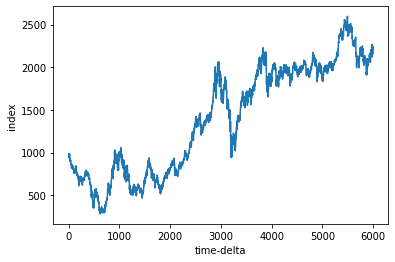

In [9]:
start = 0
dt = 5999
k = np.linspace(0, 5999, dt)

train_data = np.flipud(train_data)
np.flip(train_data[start:start+dt, 0],axis=0)
plt.plot(train_data[start:start+dt, 0])
plt.ylabel("index")
plt.xlabel("time-delta")
plt.show()

In [12]:
from scipy.interpolate import splrep, splev

fs = 11998
dt2 = 1/fs
spl = splrep(k, train_data[start:start+dt, 0] )

x1 = np.arange(0, 6000, dt2)
y1 = splev(x1, spl)
"""
plt.figure(figsize=(15, 5))
plt.plot(x1, y1, marker='o')
plt.show()
"""

"\nplt.figure(figsize=(15, 5))\nplt.plot(x1, y1, marker='o')\nplt.show()\n"

In [13]:
import math

# nfft = 샘플 개수 만큼 주파수 생성
nfft = len(x1) 

# df = 주파수 증가량
df = fs/nfft 
k2 = np.arange(nfft) 

# f = 0부터~최대주파수까지의 범위
f = k2*df 

# 스펙트럼은 중앙을 기준으로 대칭이 되기 때문에 절반만 구함
nfft_half = math.trunc(nfft/2)
f0 = f[range(nfft_half)] 

# 증폭값을 두 배로 계산(위에서 1/2 계산으로 인해 에너지가 반으로 줄었기 때문)
fft_y = np.fft.fft(y1)/nfft * 2 
fft_y0 = fft_y[range(nfft_half)]

# 벡터(복소수)의 norm 측정(신호 강도)
amp = abs(fft_y0)

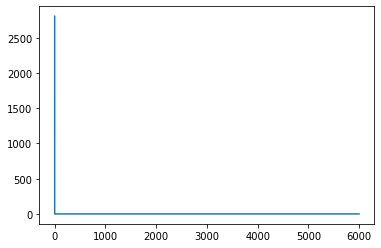

In [14]:
if True:  
    plt.figure()  
    plt.plot(f0, amp)
    plt.show()

In [15]:
# 상위 10개의 주파수
idxy = np.argsort(-amp)  
for i in range(10):  
    print('freq=', f0[idxy[i]], 'amp=', fft_y[idxy[i]])

freq= 0.0 amp= (2804.969695460913+0j)
freq= 0.00016666666666666666 amp= (-20.930771957591443+768.9461878653316j)
freq= 0.0003333333333333333 amp= (92.76921344761185+232.63881396937592j)
freq= 0.0006666666666666666 amp= (17.179236966007192+233.92911978563762j)
freq= 0.0005 amp= (-20.787601968284356+167.73123523052527j)
freq= 0.001 amp= (35.194651091148025+110.41046869996792j)
freq= 0.002 amp= (72.71876960662024+51.46460031586199j)
freq= 0.0018333333333333333 amp= (3.469508690764859+69.7846392282931j)
freq= 0.0015 amp= (-68.25310152091616+7.145191369961445j)
freq= 0.002333333333333333 amp= (38.746086629399905+53.951268782324405j)


In [ ]:
# 상위 20개의 주파수로 복원해서 원본이랑 비교해보기
# 20개의 주파수만 더해도 어느정도 복원된것을 확인할 수 있음
newy = np.zeros((nfft,)) 
arfreq = [] 
arcoec = [] 
arcoes = [] 

for i in range(20): 
    freq = f0[idxy[i]] 
    yx = fft_y[idxy[i]] 
    coec = yx.real 
    coes = yx.imag * -1 
    newy += coec * np.cos(2 * np.pi * freq * x1) + coes * np.sin(2 * np.pi * freq * x1) 
    arfreq.append(freq) 
    arcoec.append(coec) 
    arcoes.append(coes)

plt.figure() 
plt.plot(k, train_data[start:start+dt, 0], c='r', label='orginal') 
plt.plot(x1, newy, c='b', label='fft') 
plt.legend() 
plt.show()

#FFT2

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


          Date      End      Open      High       Low   Amount  \
0     19960420   941.69     948.6    952.21    941.66   42.81M   
1     19960422   950.61    941.75    957.61    941.75   57.15M   
2     19960423   940.55    951.47    957.95    940.55   52.69M   
3     19960424   956.61     940.5    956.65    934.53   46.24M   
4     19960425   964.69    957.56    977.44    957.56   57.17M   
...        ...      ...       ...       ...       ...      ...   
5994  20200217  2242.17  2,243.07  2,250.05  2,230.26  458.25M   
5995  20200218  2208.88  2,225.98  2,232.93  2,205.21  470.42M   
5996  20200219  2210.34  2,222.51  2,226.00  2,191.20  591.16M   
5997  20200220  2195.50  2,223.55  2,228.18  2,186.72  709.56M   
5998  20200221  2162.84  2,165.65  2,184.43  2,160.28  635.47M   

                    FFT(50)  
0     1569.694000-5.223480j  
1     1548.618414-5.130175j  
2     1527.514671-5.022804j  
3     1506.401297-4.901661j  
4     1485.296772-4.767078j  
...                     ...

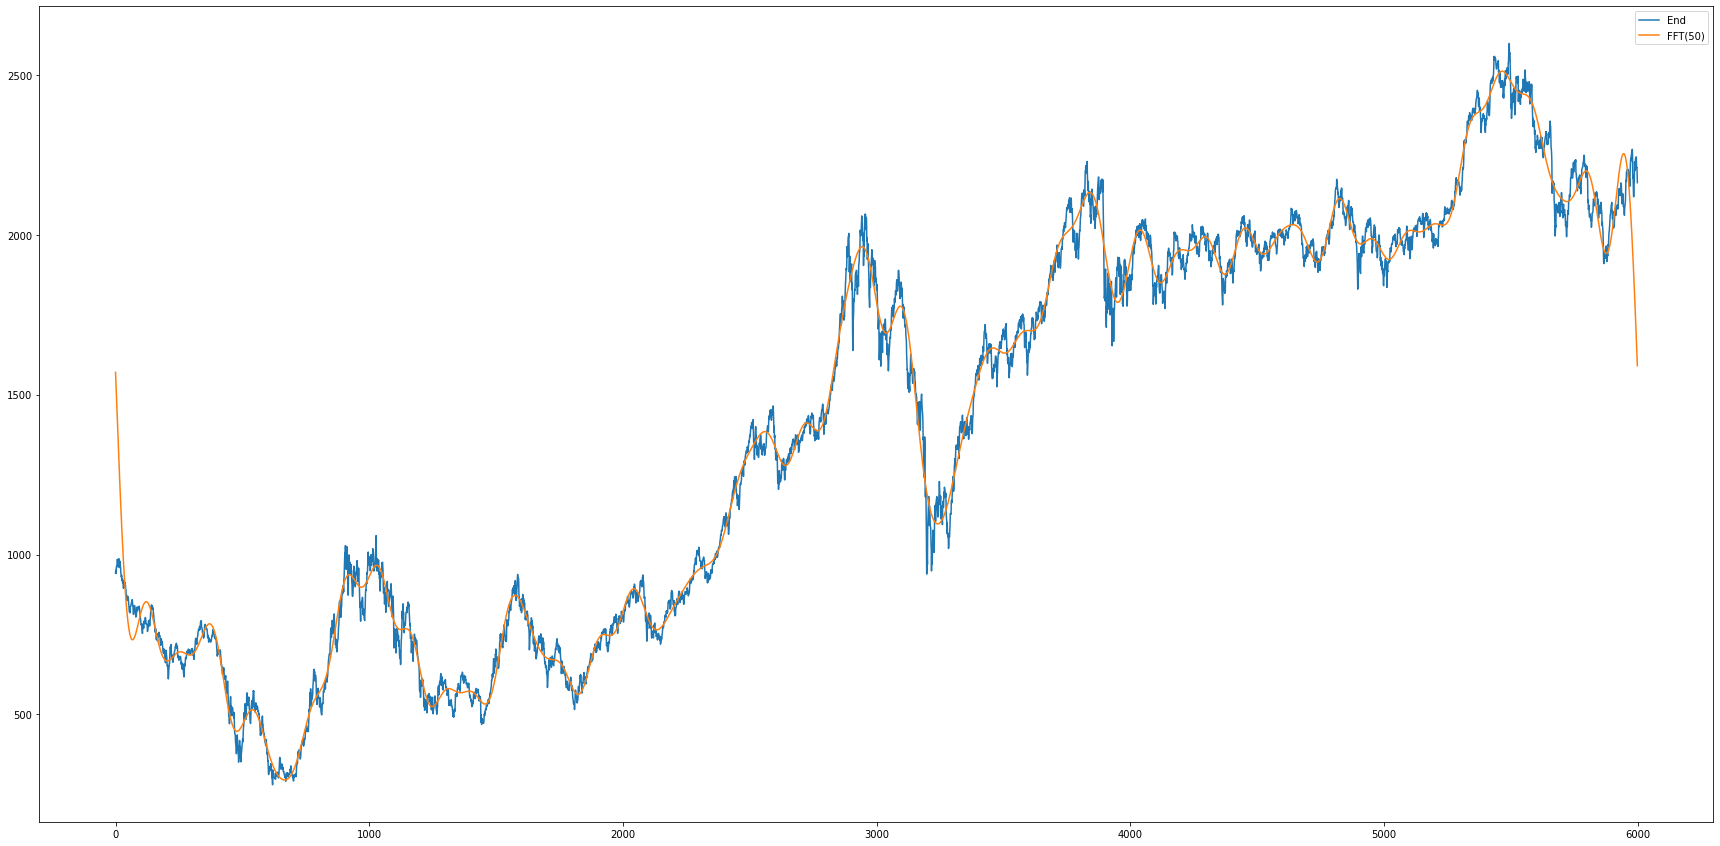

In [74]:
fft_df = date_index
def FFT(df, col, topn=2):
  fft = np.fft.fft(df[col]) 
  fft[topn:-topn] = 0 
  ifft = np.fft.ifft(fft) 
  return ifft 

fft_df['FFT(50)'] = FFT(fft_df,'End',50)

fig = plt.subplots(figsize=(30,15))
ax = plt.gca()
fft_df.plot(y='End',ax=ax)
fft_df.plot(y='FFT(50)', ax=ax)
print(fft_df)
plt.show()